# MFI vs RLU for different clones

In [26]:
import os
import warnings

import math
import numpy as np 

from IPython.display import display, HTML
import matplotlib.pyplot as plt

from neutcurve.colorschemes import CBMARKERS, CBPALETTE

import pandas as pd
from plotnine import *

import yaml

In [32]:
MFI_RLU_df = pd.read_csv('MFI_vs_RLU.csv')
MFI_RLU_df

,cells,MFI,RLU/ul,relative_MFI,relative_RLU
0,very low,699.0,1830.92,0.058878,0.035987
1,low,1396.0,8123.15,0.117588,0.159661
2,medium,2037.0,39923.31,0.171580,0.784697
3,high,11872.0,50877.35,1.000000,1.000000


In [33]:
MFI_RLU_df = MFI_RLU_df.loc[MFI_RLU_df['cells'] != 'medium']

cat_order = ['very low', 'low', 'high']
MFI_RLU_df['cells'] = pd.Categorical(MFI_RLU_df['cells'], categories=cat_order, ordered=True)


/tmp/ipykernel_56306/2625649880.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [34]:
MFI_RLU_df

,cells,MFI,RLU/ul,relative_MFI,relative_RLU
0,very low,699.0,1830.92,0.058878,0.035987
1,low,1396.0,8123.15,0.117588,0.159661
3,high,11872.0,50877.35,1.000000,1.000000


In [35]:
theme_set(theme_seaborn(style='white', context='talk', font_scale=1))
plt.style.use('seaborn-white')

/fh/fast/bloom_j/software/miniconda3/envs/BloomLab/lib/python3.8/site-packages/plotnine/guides/guides.py:197: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it
/fh/fast/bloom_j/software/miniconda3/envs/BloomLab/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 4 x 4 in image.
/fh/fast/bloom_j/software/miniconda3/envs/BloomLab/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: cell_vs_MFI.png
/fh/fast/bloom_j/software/miniconda3/envs/BloomLab/lib/python3.8/site-packages/plotnine/guides/guides.py:197: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


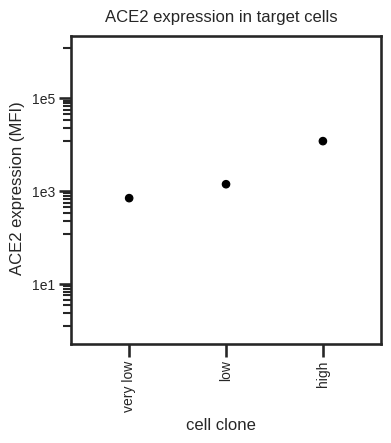

In [36]:


p = (ggplot(MFI_RLU_df, 
            aes(x='cells', y='MFI')
           ) +
     geom_point(size=2.5)+
     theme(axis_text_x=element_text(angle=90),
           figure_size=(4,4),
           axis_text=element_text(size=10),
           legend_text=element_text(size=10),
           legend_title=element_text(size=10),
           axis_title=element_text(size=12),
           title=element_text(size=12),
           strip_text = element_text(size=10)
          ) +
     xlab('cell clone') +
          scale_y_log10(limits=[1,1.1e6]) +
     labs(y ='ACE2 expression (MFI)',
          title ='ACE2 expression in target cells') +
     scale_color_manual(values=("#009E73","#56B4E9","#E69F00","#999999"))
    )

_ = p.draw()

p.save('cell_vs_MFI.png', dpi=300)
